In [311]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd


# ReLU

Rectified Linear Unit (ReLU) is the goto activation function for hidden layers in present days replacing sigmoid function which was generally used. It replaces negative activations with zero


In [312]:
def ReLU(Z_values):
    return np.maximum(0,Z_values)

# ReLU Derivative

Modifies activation values to 0 or 1. Value is modified to 1 if activation value is greater than 0 else modified to 0.

In [313]:
def ReLU_derivative(x):
    return (x > 0).astype(int)
# def ReLU_derivative(x, epsilon=1e-8):
#     return (x > epsilon).astype(int)

# Forward Propagation

In [314]:
def forward_propagation(X, Layers, Weights=None, Biases=None):
    # Initialize weights and biases if unspecified
    if Weights is None:
        Weights=[]
        Weights.append(np.random.rand(X.shape[1], Layers[0]))
        for i in range(1, len(Layers)):
            Weights.append(np.random.rand(Weights[i-1].shape[1], Layers[i]))
#         Weights = []
#         Weights.append(np.random.randn(X.shape[1], Layers[0]) * np.sqrt(2 / X.shape[1]))
#         for i in range(1, len(Layers)):
#             Weights.append(np.random.randn(Layers[i-1], Layers[i]) * np.sqrt(2 / Layers[i-1]))


    if Biases is None:
        Biases=[]
        Biases = [np.random.rand(n_units) for n_units in Layers]
    
    Z_values = []
    Activations = []
    
    print("Starting forward propagation...")
    
    # First layer
    dot_product = np.dot(X, Weights[0]) 
    L1_value = dot_product + Biases[0][np.newaxis, :]
    Z_values.append(L1_value)
    Activations.append(ReLU(L1_value))
#     print(f"Layer 1 Activation Shape: {Activations[-1].shape} Weights Shape : {Weights[0].shape}")
    
    # Remaining layers
    for i in range(len(Layers) - 1):  
        dot_product = np.dot(Activations[i], Weights[i+1])
        Z_value = dot_product + Biases[i+1]
        Z_values.append(Z_value)
        Activations.append(ReLU(Z_value))
#         print(f"Layer {i + 2} Activation Shape: {Activations[-1].shape}")
    y_cap=[Activations[-1]]
    
    return Activations, Weights, Biases, y_cap, Z_values


Testing Forward Propagation

In [315]:
activation_values,W,B,_,_=forward_propagation(np.random.rand(10,3),Layers=[4,2,1])
for i in range(len(activation_values)):
    print(f"Layer {i+1} Activation: {activation_values[i]} \n\n Weights: {W[i]}\n\n Biases: {B[i]}\n\n")

Starting forward propagation...
Layer 1 Activation: [[1.10449432 1.28862874 1.22164721 1.17002564]
 [1.44830937 1.52407879 1.40906453 1.52999429]
 [1.11243343 1.40599084 1.14447304 1.31340686]
 [0.50403972 0.74303263 0.81555059 0.50125189]
 [1.76727958 1.42108344 1.68574913 1.56675887]
 [1.80321545 2.02537064 1.63361647 2.06177799]
 [1.40683922 1.06036104 1.43649235 1.14573242]
 [1.59694618 1.32408546 1.55881968 1.42579799]
 [1.76383558 1.47452625 1.64950278 1.62616365]
 [1.19271611 1.25378101 1.28022664 1.18812171]] 

 Weights: [[0.61851958 0.598196   0.45431733 0.68947099]
 [0.52990721 0.73793115 0.25494646 0.84209881]
 [0.77537102 0.05739419 0.54365442 0.39499212]]

 Biases: [0.39941169 0.70159489 0.7435835  0.42328453]


Layer 2 Activation: [[2.17022113 3.7428614 ]
 [2.50832826 4.48983531]
 [2.25944854 3.80420279]
 [1.49590397 2.32808028]
 [2.59853128 5.0136395 ]
 [3.02791711 5.43370822]
 [2.17193287 4.1416699 ]
 [2.44687904 4.64490156]
 [2.63524298 5.03017149]
 [2.19232362 3.87790

Using MSE as cost function

In [316]:
def calculate_cost(Y, calculated_value):
    cost = np.mean((np.array(Y) - calculated_value) ** 2) / 2
    print(f"Cost: {cost}")
    return cost
    

# Calculating Gradients 


In [317]:
def calculate_gradients(Y, Weights, Biases, Activations):
    print("Calculating gradients...")
    weight_gradient = []
    bias_gradient = []
    
    # Output layer
    activation_gradient = (Activations[-1] - np.array(Y).reshape(-1, 1))/len(Y)
    Z_gradient = activation_gradient * ReLU_derivative(Activations[-1])
    W_gradient = np.dot(Z_gradient.T, Activations[-2])
    weight_gradient.insert(0, W_gradient.T)
    bias_gradient.insert(0, np.sum(Z_gradient, axis=0))
#     print(f"Output Layer Gradients - W: {W_gradient.shape}, B: {bias_gradient[-1].shape}")
    
    # Hidden layers
    for i in range(1, len(Weights)):
        activation_gradient = np.dot(Z_gradient, Weights[-i].T)
        Z_gradient = activation_gradient * ReLU_derivative(Activations[-i-1])
        W_gradient = np.dot(Z_gradient.T, Activations[-i-2])
        weight_gradient.insert(0, W_gradient.T)
        bias_gradient.insert(0, np.sum(Z_gradient, axis=0))
#         print(f"Layer {len(Weights) - i} Gradients - W: {W_gradient.shape}, B: {bias_gradient[-1].shape}")
    
    for i in range(len(weight_gradient)):
        print(f"Layer: {i+1} \n")
        print(f" weight : {Weights[i]}\n weight_grad :{weight_gradient[i]} \n\n")
        print(f" bias : {Biases[i]} \n bias_grad :{bias_gradient[i]}\n\n\n")

    return weight_gradient, bias_gradient

# Back Propagation


In [318]:
def backward_propagation(X, Y, W, b, Activations, learning_rate):
    print("Performing backward propagation...")
    new_activation = Activations.copy()
    new_activation.insert(0, X)
    
    weight_gradient, bias_gradient = calculate_gradients(Y, W, b, new_activation)
    
    # Update weights and biases
    new_weights = []
    new_biases = []
    for i in range(len(W)):
        new_weights.append(W[i] - learning_rate * weight_gradient[i])
        new_biases.append(b[i] - learning_rate * bias_gradient[i])
#         print(f"Updated Layer {i + 1} Weights Shape: {new_weights[-1].shape}, Biases Shape: {new_biases[-1].shape}")
    
    return new_weights, new_biases

# MLP

In [319]:
def MLP(X, y, Layers, iterations, learning_rate, error_margin):
    print("Training MLP...")
    iteration_count = 0
    cost = 100
    cost_history = []
 
    
    while iteration_count < iterations:
#     while iteration_count < 20: #Using fixed custom iterations for testing
        print(f"\nIteration {iteration_count + 1}")
        activation, weight, bias, _,_ = forward_propagation(X, Layers)
        cost = calculate_cost(y, activation[-1])
        cost_history.append(cost)
        
        W, B = backward_propagation(X, y, weight, bias, activation, learning_rate)
        
        if cost <= error_margin:
            print("Error margin reached, stopping training.")
            break
        
        iteration_count += 1
    
    return W, B, Layers, cost_history

# Testing MLP 

Training MLP...

Iteration 1
Starting forward propagation...
Cost: 1.524595466451232
Performing backward propagation...
Calculating gradients...
Layer: 1 

 weight : [[0.87533084 0.36721894 0.19273747 0.53941453 0.54407559 0.19676391
  0.62437185 0.05326348]
 [0.18316749 0.39001111 0.92098501 0.66200418 0.29096609 0.22672928
  0.7596117  0.68204326]
 [0.26386737 0.80120415 0.97850866 0.27418367 0.56193486 0.11489391
  0.14975626 0.38689401]]
 weight_grad :[[0.12972549 0.09288223 0.12197789 0.14913842 0.16010251 0.07744432
  0.15833989 0.0962496 ]
 [0.13209223 0.0945768  0.12420328 0.15185934 0.16302346 0.07885723
  0.16122867 0.09800559]
 [0.12862989 0.0920978  0.12094772 0.14787887 0.15875036 0.07679027
  0.15700263 0.09543672]] 


 bias : [0.84483304 0.49753656 0.06905085 0.16262187 0.04855502 0.83131414
 0.90609893 0.07790877] 
 bias_grad :[0.22513517 0.16119467 0.21168941 0.2588258  0.27785369 0.13440258
 0.2747947  0.16703864]



Layer: 2 

 weight : [[0.48535526 0.23083652 0.6577

0.5494086991972018
40.78872132748404
473.97081109860267
83.4325048371735
41.826137792385765
21.621859595522064
124.97837926917958
30.8264969491168
78.2129161539688
32.155331873288695
402.2042157041353
220.42967698016633
16.78960741521841
67.62320527260033
73.0794746900715
14.83844268004285
122.61582842729369
304.5942116044955
53.912925076335526
83.61382007124983
95.34501152604373
78.68949392632419
4.744457753940329
183.45118394382834
3.1696556163488223
163.4823570501716
79.21912105438939
2.5467628750341866


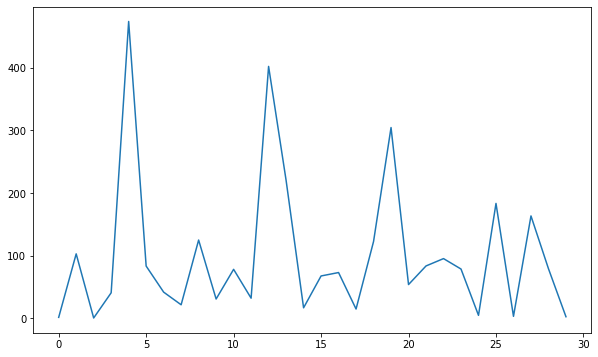

In [326]:
X = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

Y = np.sum(X, axis=1) % 2  
train_iterations=30

# wt,bias,layers,cost_history=MLP(np.random.rand(10,3),[1,2,3,4,5,6,7,8,9,10],[4,2,1],100,0.01,0.5)
wt, bias, layers, cost_history = MLP(X, Y, [8,4,2,1], iterations=train_iterations, learning_rate=0.01, error_margin=0.01)

for i in cost_history:
    print(i)
plt.figure(figsize=(10,6))
plt.plot([i for i in range(train_iterations)],cost_history)
plt.show()

# Inferencing Values using trained MLP

In [321]:
_, _, _, i ,_=forward_propagation(X=[1,0,1],Weights=wt,Biases=bias,Layers=[4,2,1])
i

Starting forward propagation...


[array([[3.12200493]])]

In [322]:
# np.random.rand?
# np.maximum?

# Critical Evaluation

Following aspects will be added in the future:
1) Regularization to avoid overfitting
2) Cross validation for overfitting training set
3) Adam optimizer for momentum during learning
4) Adapt Batch processing instead of using whole training set each iteration
5) Class based approach for building model making the code easier and intuitive
6) Option to use various activation functions besides ReLU
7) Hyperparameter Tuning